In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import seaborn as sns

In [112]:
# extract subject (s1, s2) and session (t1, t2) from filename
def extract_subject_session(filename):
    match = re.search(r'error_angles_(\d+)_MB(\d+)\.csv', filename)
    if match:
        subject = f"S{match.group(2)}"  # extract subject from mb1/mb2
        session = f"T{match.group(1)}"  # extract session from 01/02
        return subject, session
    return None, None  

# read csv and assign trial numbers, conditions, subject, and session
def read_and_process_csv(file_path):
    filename = os.path.basename(file_path)  
    subject, session = extract_subject_session(filename)  

    df = pd.read_csv(file_path, header=None, names=['error_angle'])  
    df.insert(0, 'trial_number', range(1, len(df) + 1))  

    # define condition labels based on trial order
    conditions = ['no pert', 'pertubation', 'no pert', 'interference', 'no pert', 'alternating']
    trial_counts = [20, 60, 20, 60, 20, 40]
    
    # generate condition labels in the correct order
    trial_condition = []
    for condition, count in zip(conditions, trial_counts):
        trial_condition.extend([condition] * count)  

    df['condition'] = trial_condition  
    df['subject'] = subject  
    df['session'] = session  
    
    return df

In [113]:
# define the directory path
path = '/Users/sascha/Library/Mobile Documents/com~apple~CloudDocs/Uni_Tübingen/Semester1/NeuralModelling/Assignments/Assignment7'

# list of csv files
files = [
    'error_angles_01_MB1.csv',
    'error_angles_02_MB1.csv',
    'error_angles_01_MB2.csv',
    'error_angles_02_MB2.csv'
]

# process each file
dfs = [read_and_process_csv(os.path.join(path, file)) for file in files]

# concatenate all datasets
df = pd.concat(dfs, ignore_index=True)

In [120]:
print('length with outliers:', len(df))
# exclude outliers
df_abs = df[(df['error_angle'] >= -100) & (df['error_angle'] <= 100)]

df_abs['error_angle'] = df_abs['error_angle'].abs()

# display the first few rows to verify structure
print('length without outliers:', len(df_abs))

# plot the data
df_abs.head()


length with outliers: 880
length without outliers: 877


/var/folders/_w/fvv3yfg57mj4b3g4yftq72cr0000gn/T/ipykernel_1304/2558314452.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abs['error_angle'] = df_abs['error_angle'].abs()


,trial_number,error_angle,condition,subject,session
0,1,1.202884,no pert,S1,T01
1,2,2.001457,no pert,S1,T01
2,3,2.070031,no pert,S1,T01
3,4,1.325373,no pert,S1,T01
4,5,2.189654,no pert,S1,T01


In [115]:
# compute mean and standard deviation for each condition, subject, and session
subject_summary = df_abs.groupby(['subject', 'session', 'condition'])['error_angle'].agg(['mean', 'std']).reset_index()

print("\n### Mean and Standard Deviation for Each Subject, Session, and Condition ###\n")
print(subject_summary)


### Mean and Standard Deviation for Each Subject, Session, and Condition ###

   subject session     condition       mean       std
0       S1     T01   alternating   7.013982  4.863105
1       S1     T01  interference   7.258252  4.552945
2       S1     T01       no pert   3.083874  2.460899
3       S1     T01   pertubation  13.225381  4.436969
4       S1     T02   alternating   5.062877  3.041681
5       S1     T02  interference   6.638978  4.883979
6       S1     T02       no pert   4.252960  3.711527
7       S1     T02   pertubation   5.096078  4.615608
8       S2     T01   alternating   5.062877  3.041681
9       S2     T01  interference   7.071769  4.548039
10      S2     T01       no pert   3.662131  3.236108
11      S2     T01   pertubation   5.461548  5.677382
12      S2     T02   alternating   5.760745  5.046463
13      S2     T02  interference   4.746189  3.611576
14      S2     T02       no pert   3.094167  2.290711
15      S2     T02   pertubation   4.755477  3.226789


In [116]:
# compute overall statistics across all subjects and sessions
overall_summary = df_abs.groupby('condition')['error_angle'].agg(['mean', 'std']).reset_index()

print("\n### Overall Mean and Standard Deviation Across All Subjects and Sessions ###\n")
print(overall_summary)


### Overall Mean and Standard Deviation Across All Subjects and Sessions ###

      condition      mean       std
0   alternating  5.725120  4.150298
1  interference  6.428797  4.508911
2       no pert  3.525122  3.003504
3   pertubation  7.083438  5.737965


In [117]:
# within-subject comparison of conditions across sessions
subject_session_comparison = df_abs.groupby(['subject', 'condition', 'session'])['error_angle'].mean().unstack()

print("\n### Condition Comparison Within Each Subject Across Sessions ###\n")
print(subject_session_comparison)


### Condition Comparison Within Each Subject Across Sessions ###

session                     T01       T02
subject condition                        
S1      alternating    7.013982  5.062877
        interference   7.258252  6.638978
        no pert        3.083874  4.252960
        pertubation   13.225381  5.096078
S2      alternating    5.062877  5.760745
        interference   7.071769  4.746189
        no pert        3.662131  3.094167
        pertubation    5.461548  4.755477


In [118]:
# session comparison across subjects
session_comparison = df_abs.groupby(['session', 'condition'])['error_angle'].mean().unstack()

print("\n### Session Comparison Across Both Subjects ###\n")
print(session_comparison)



### Session Comparison Across Both Subjects ###

condition  alternating  interference   no pert  pertubation
session                                                    
T01           6.038430      7.165010  3.375432     9.277669
T02           5.411811      5.692584  3.673564     4.925777


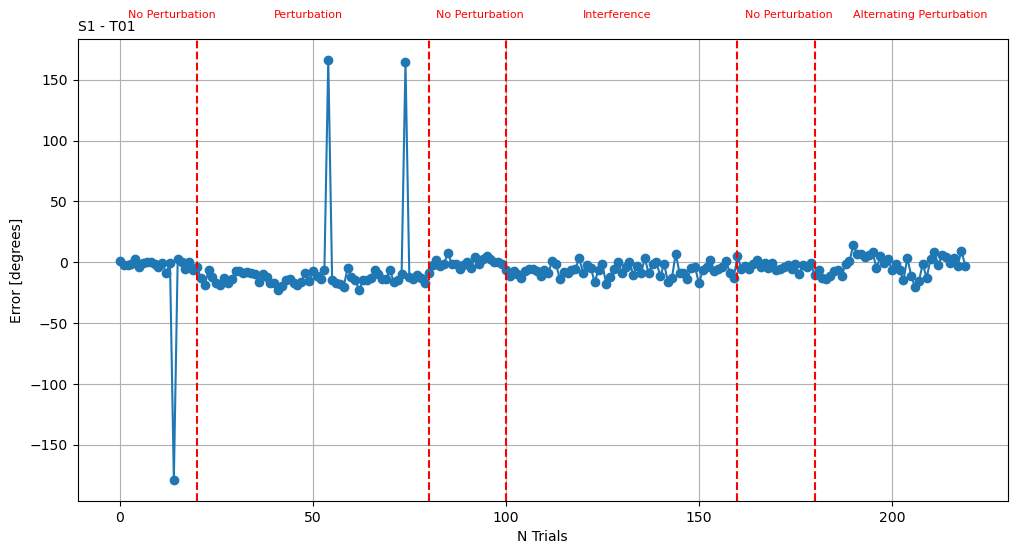

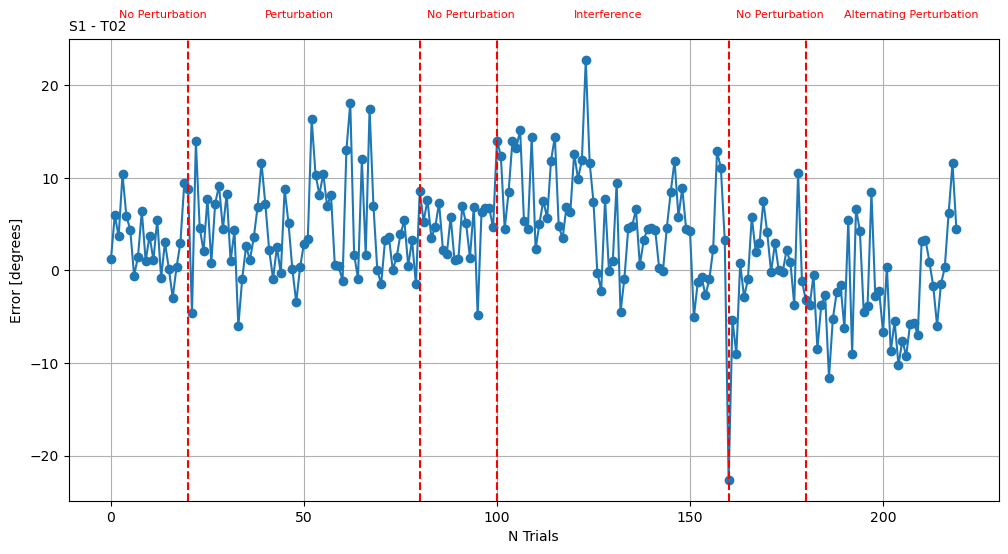

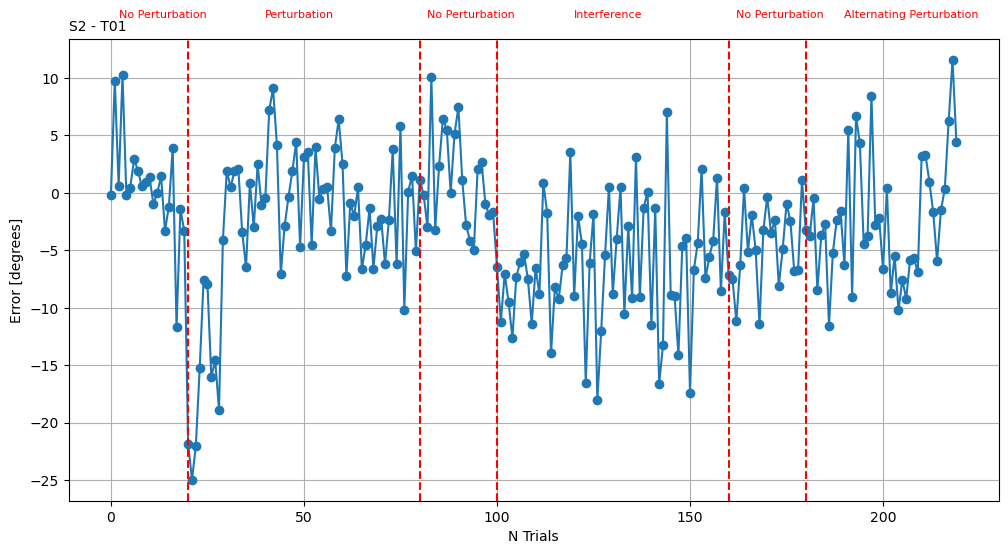

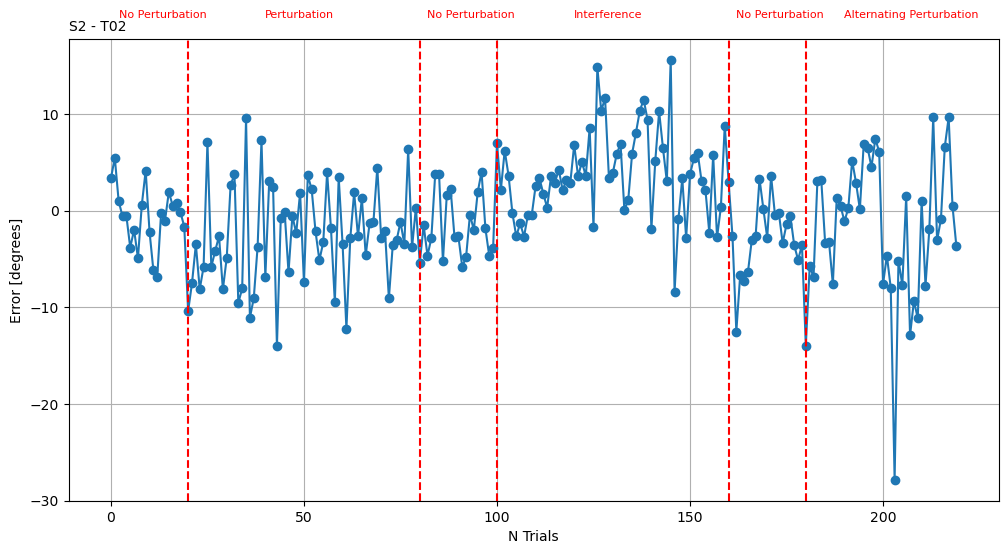

In [119]:
# define save path for plots
save_path = '/Users/sascha/Library/Mobile Documents/com~apple~CloudDocs/Uni_Tübingen/Semester1/NeuralModelling/Assignments/Assignment7/'

# function to plot error angles for a given subject and session
def plot_subject_session_error_angles(df, subject, session):
    session_df = df[(df['subject'] == subject) & (df['session'] == session)]  # filter data for subject & session
    error_angles = session_df['error_angle'].values  # extract error angles

    # calculate y-coordinate for labels
    y_coordinate = max(error_angles) + (max(error_angles) - min(error_angles)) * 0.1

    # create figure
    plt.figure(figsize=(12, 6))
    plt.plot(error_angles, marker='o', linestyle='-')
    plt.xlabel('N Trials')
    plt.ylabel('Error [degrees]')
    plt.title(f'{subject} - {session}', loc='left', fontdict={'fontsize': 10})
    plt.grid()

    # mark different perturbation types (trials: 20, 80, 100, 160, 180)
    perturbation_lines = [20, 80, 100, 160, 180]
    for x in perturbation_lines:
        plt.axvline(x, color='r', linestyle='--')

    # add condition labels
    labels = [
        ('No Perturbation', 2),
        ('Perturbation', 40),
        ('No Perturbation', 82),
        ('Interference', 120),
        ('No Perturbation', 162),
        ('Alternating Perturbation', 190)
    ]

    for label, x_pos in labels:
        plt.text(x_pos, y_coordinate, label, color='r', fontsize=8)

    # save and show plot
    #plt.savefig(os.path.join(save_path, f'error_angles_{subject}_{session}.png'))
    plt.show()

# generate plots for each subject and session
for subject in df['subject'].unique():
    for session in df['session'].unique():
        plot_subject_session_error_angles(df, subject, session)

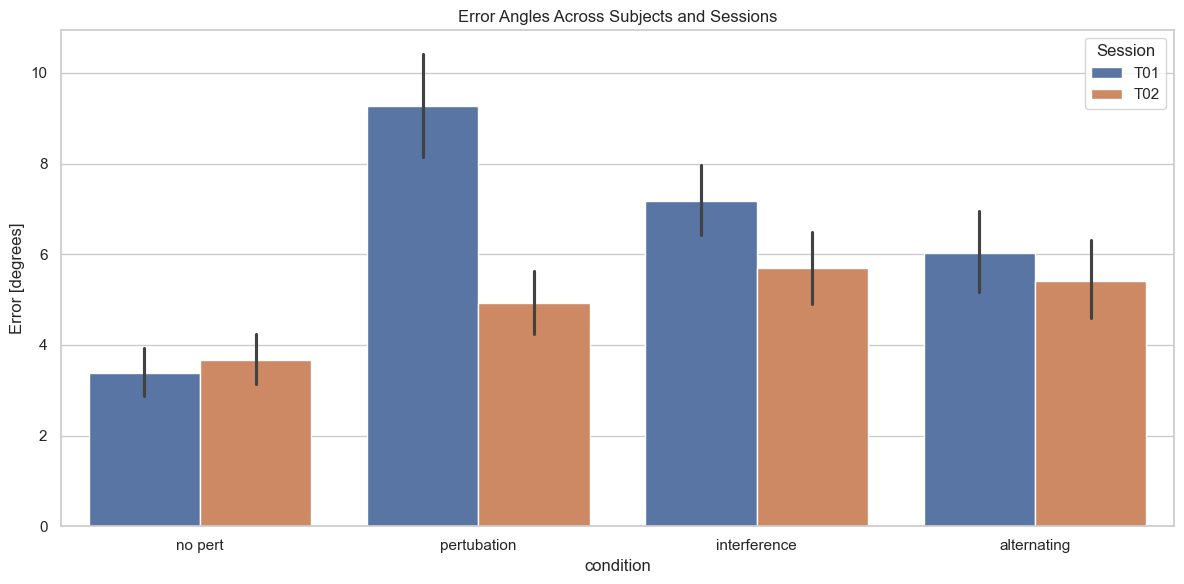

In [121]:
# make a plot comparing the error angles between sessions
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=df_abs, x='condition', y='error_angle', hue='session')
plt.ylabel('Error [degrees]')
plt.title('Error Angles Across Subjects and Sessions')
plt.legend(title='Session')
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'error_angles_comparison.png'))
plt.show()

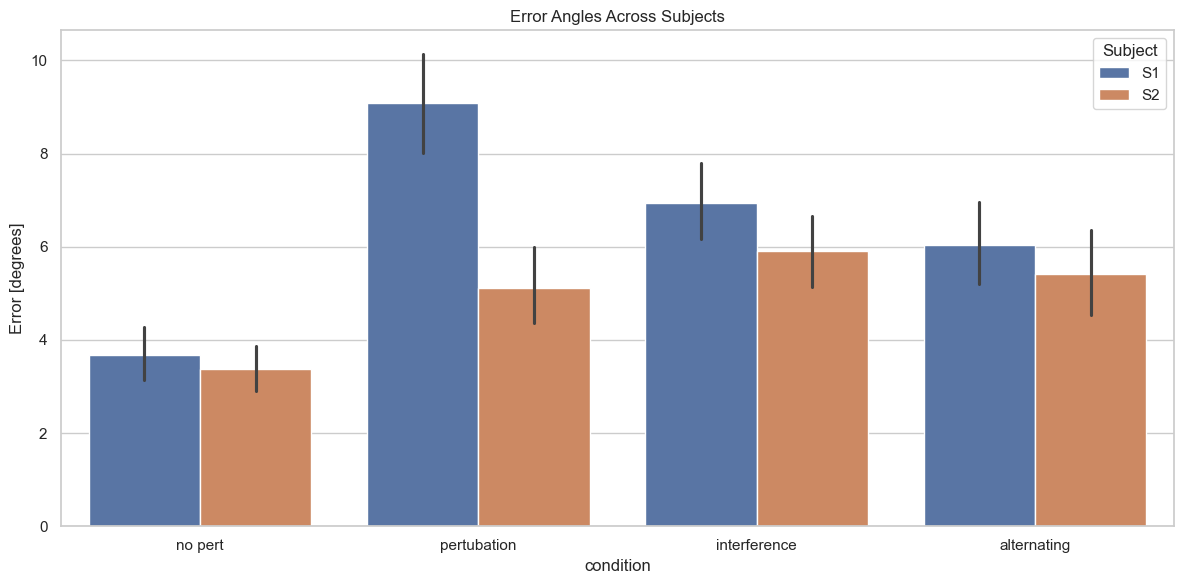

In [122]:
# make a plot comparing the error angles between subjects
plt.figure(figsize=(12, 6))
sns.barplot(data=df_abs, x='condition', y='error_angle', hue='subject')
plt.ylabel('Error [degrees]')
plt.title('Error Angles Across Subjects')
plt.legend(title='Subject')
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'error_angles_subject_comparison.png'))
plt.show()